# AIoT Project: Motion Sensing and Classification

## Project Summary
This AIoT project utilizes an ESP32 microcontroller, an MPU6050 accelerometer/gyroscope sensor, an LCD display, and a potentiometer to build a real-time motion classification system. By leveraging a trained Random Forest machine learning model, the system identifies six different physical activities (e.g., bench press, overhead press, deadlift, squat, row, rest) and displays the results on the LCD. The system is designed for fitness tracking, sports performance monitoring, and real-time activity recognition. It integrates hardware and software to demonstrate a complete AIoT pipeline, from data collection and model training to deployment and visualization.

This project demonstrates how to build an AIoT system using ESP32 and MPU6050 for real-time motion classification. A special thanks to IIT Kharagpur AI4ICPS for conducting a workshop on AI and ML for PCB design, which provided the foundational knowledge and inspiration for creating this project. For more information, visit their website: [AI4ICPS](https://www.ai4icps.in/).

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#from micromlgen import port ## For this micromlgen needs to be installed steps discussed below

## Read the `motion_sensor.csv` file

In [3]:
df=pd.read_csv('https://github.com/vmahawar/data-science-datasets-collection/raw/main/motion_sensor.csv')
df.shape

(9009, 11)

In [4]:
df.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   epoch (ms)       9009 non-null   object 
 1   Accelerometer_x  9009 non-null   float64
 2   Accelerometer_y  9009 non-null   float64
 3   Accelerometer_z  9009 non-null   float64
 4   Gyroscope_x      9009 non-null   float64
 5   Gyroscope_y      9009 non-null   float64
 6   Gyroscope_z      9009 non-null   float64
 7   Participants     9009 non-null   object 
 8   Label            9009 non-null   object 
 9   Category         9009 non-null   object 
 10  Set              9009 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 774.3+ KB


In [6]:
df.columns

Index(['epoch (ms)', 'Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z',
       'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z', 'Participants', 'Label',
       'Category', 'Set'],
      dtype='object')

In [7]:
df.isnull().sum()

epoch (ms)         0
Accelerometer_x    0
Accelerometer_y    0
Accelerometer_z    0
Gyroscope_x        0
Gyroscope_y        0
Gyroscope_z        0
Participants       0
Label              0
Category           0
Set                0
dtype: int64

In [8]:
df['epoch (ms)'].value_counts()

epoch (ms)
2019-01-11 15:08:05.200    1
2019-01-18 16:45:54.800    1
2019-01-18 16:45:53.600    1
2019-01-18 16:45:53.800    1
2019-01-18 16:45:54.000    1
                          ..
2019-01-14 13:57:38.600    1
2019-01-14 13:57:38.400    1
2019-01-14 13:57:38.200    1
2019-01-14 13:57:38.000    1
2019-01-20 17:33:27.800    1
Name: count, Length: 9009, dtype: int64

In [9]:
df['Participants'].value_counts()

Participants
A    2988
E    2645
C    1481
D    1052
B     843
Name: count, dtype: int64

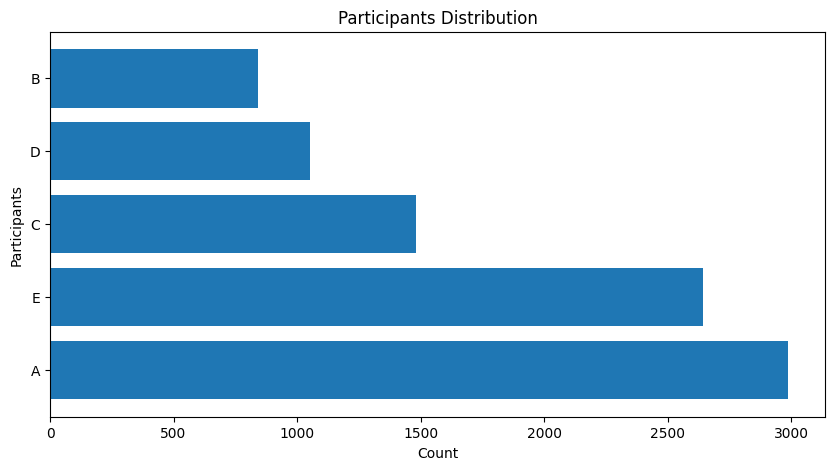

In [10]:
# Assuming 'Participants' is a column in your DataFrame (df)
value_counts = df['Participants'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
plt.barh(value_counts.index, value_counts.values)  # Pass index (categories) and values (counts)
plt.xlabel('Count')  # Add x-axis label
plt.ylabel('Participants')  # Add y-axis label
plt.title('Participants Distribution')  # Add title
plt.show()


In [11]:
df['Label'].value_counts()

Label
ohp      1676
bench    1665
squat    1610
dead     1531
row      1417
rest     1110
Name: count, dtype: int64

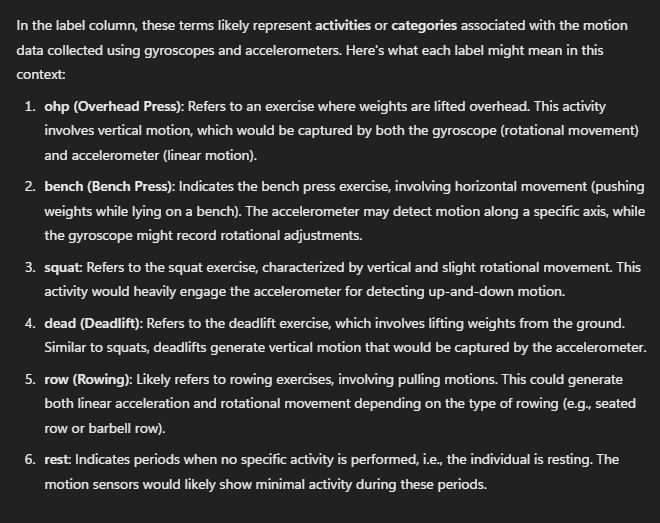

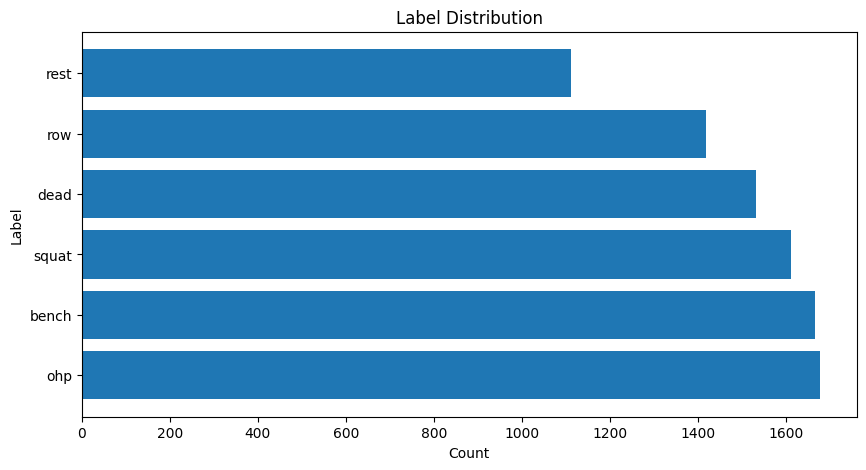

In [12]:
# Assuming 'Participants' is a column in your DataFrame (df)
value_counts = df['Label'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
plt.barh(value_counts.index, value_counts.values)  # Pass index (categories) and values (counts)
plt.xlabel('Count')  # Add x-axis label
plt.ylabel('Label')  # Add y-axis label
plt.title('Label Distribution')  # Add title
plt.show()

In [13]:
df['Category'].value_counts()

Category
medium      4437
heavy       3462
standing     600
sitting      510
Name: count, dtype: int64

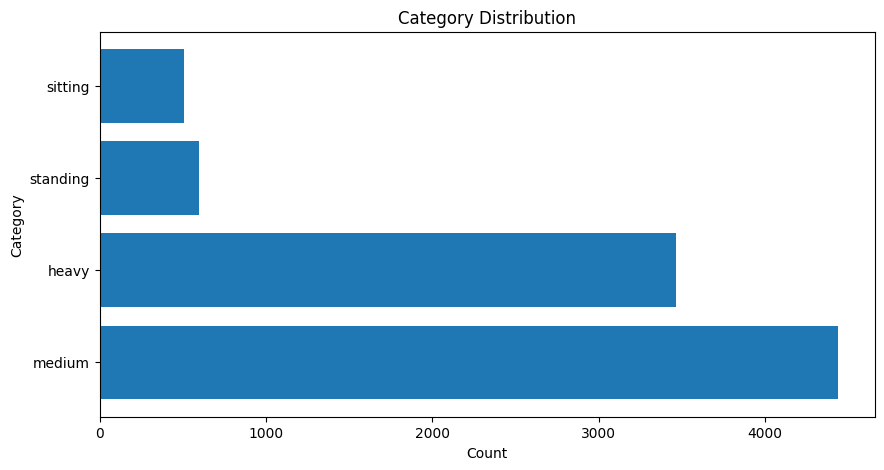

In [14]:
# Assuming 'Participants' is a column in your DataFrame (df)
value_counts = df['Category'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
plt.barh(value_counts.index, value_counts.values)  # Pass index (categories) and values (counts)
plt.xlabel('Count')  # Add x-axis label
plt.ylabel('Category')  # Add y-axis label
plt.title('Category Distribution')  # Add title
plt.show()

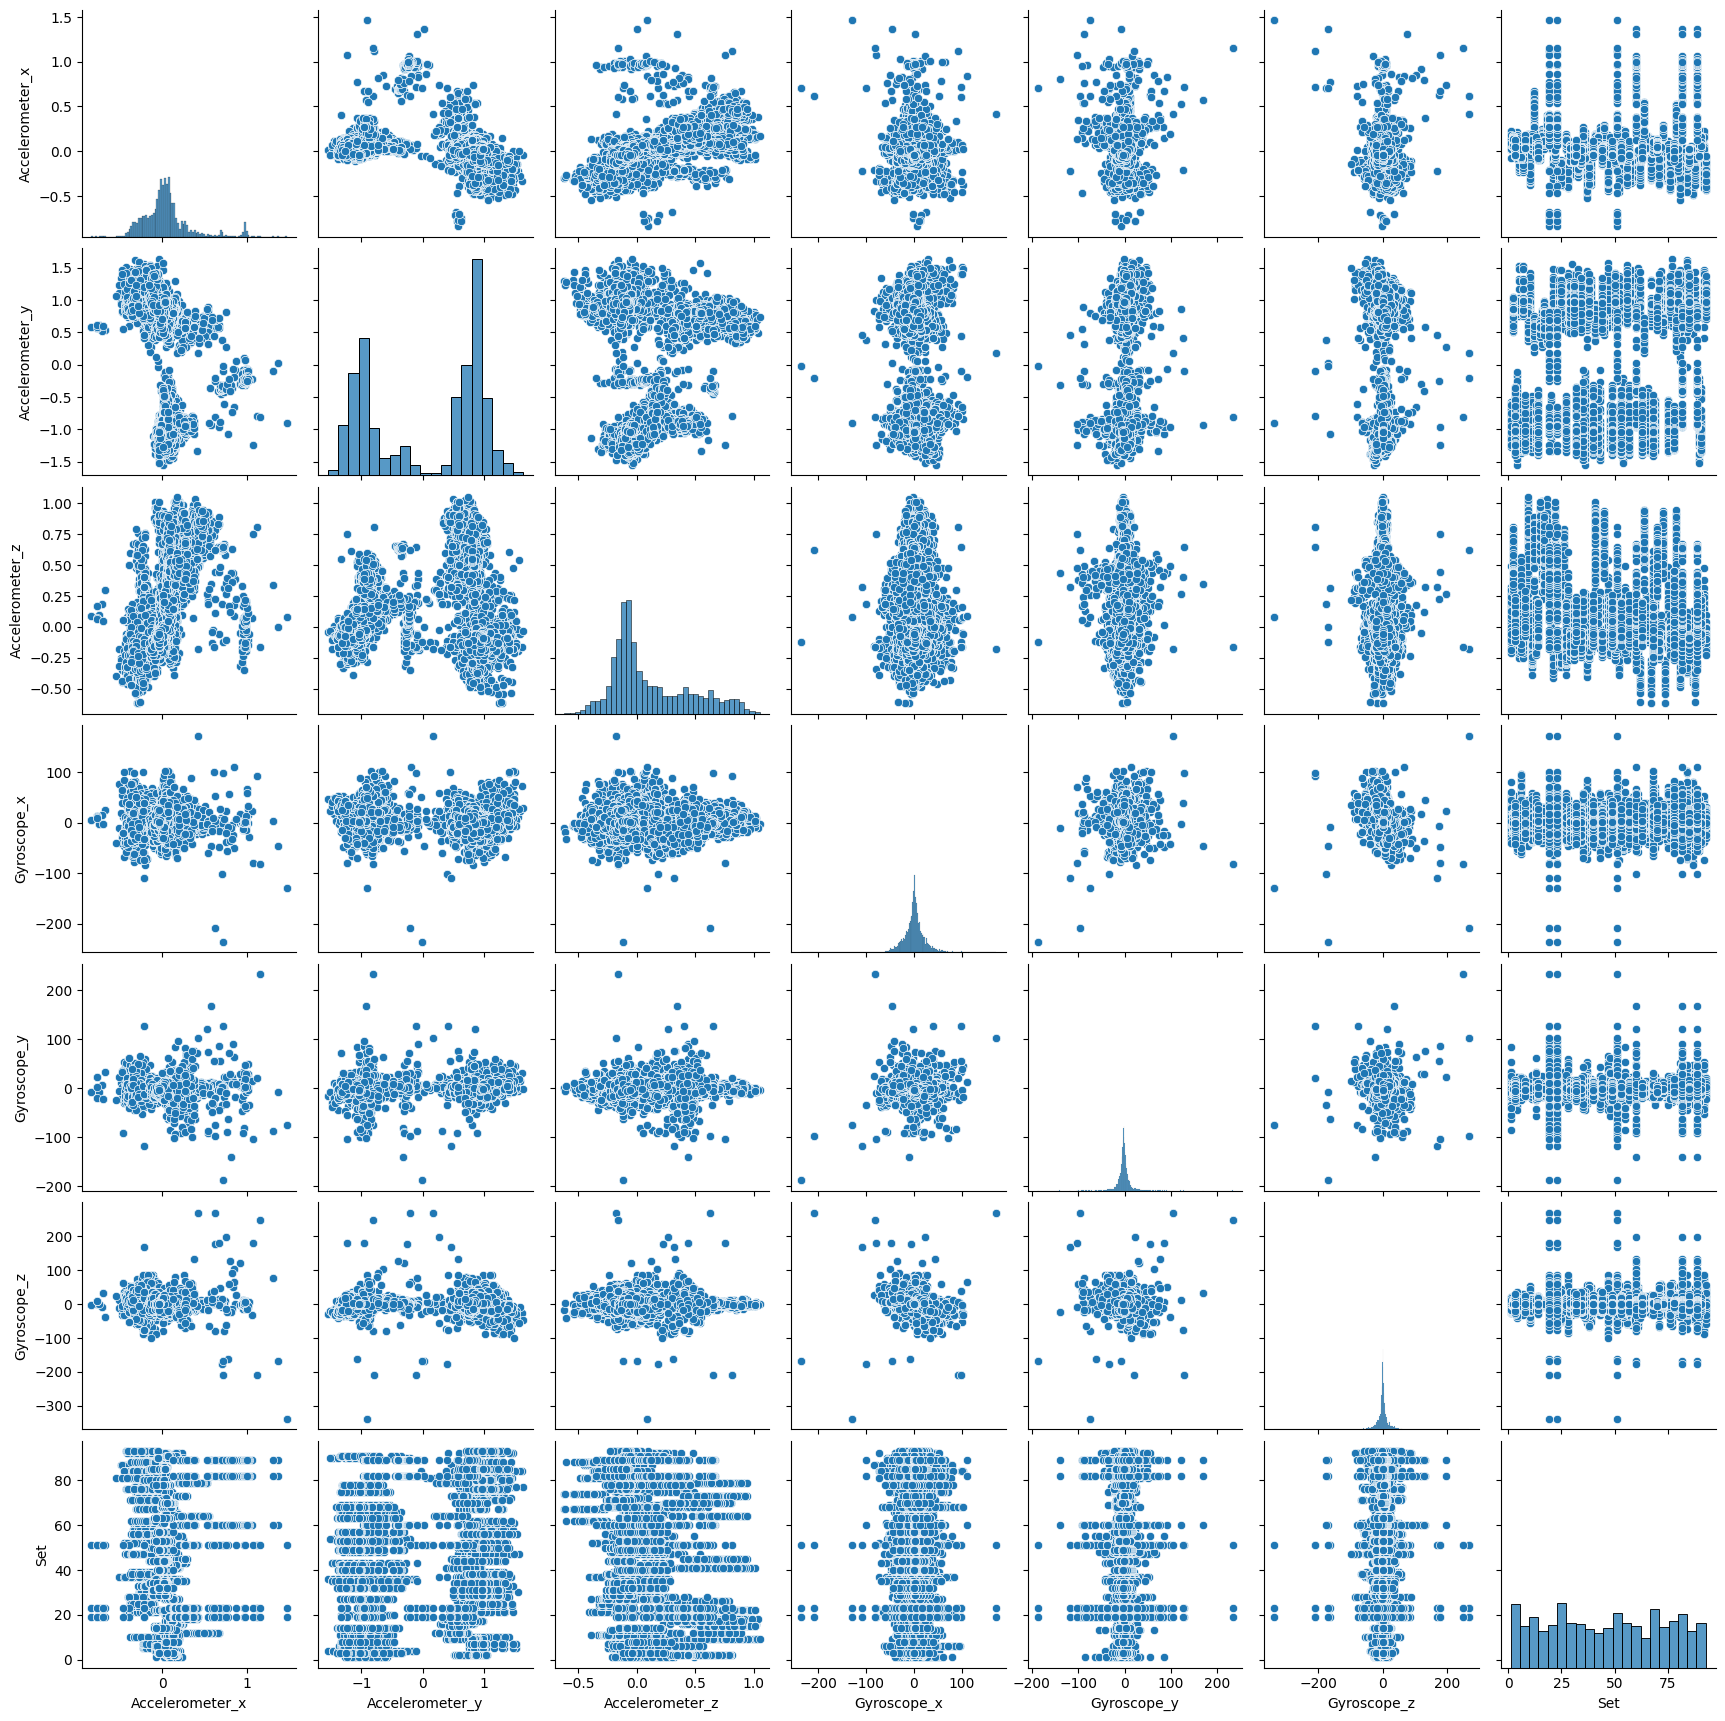

In [15]:
sns.pairplot(df)
plt.show()

## Typical Dataset Explanation

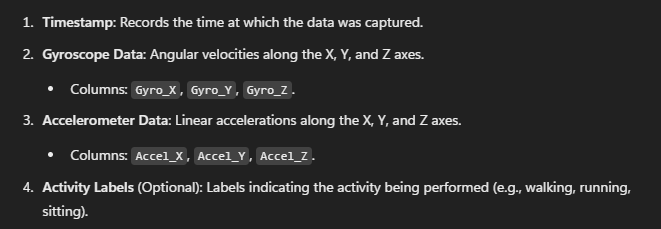

In [16]:
df_new = df.loc[:,['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z', 'Label']]
df_new.head()

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Label
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,bench
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,bench
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,bench
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,bench
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,bench


In [39]:
df_new[df_new['Label']=='squat'].head(5)

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Label
1380,0.135333,0.694667,0.735333,2.5366,-0.6220,1.6098,squat
1381,0.097500,0.651500,0.658000,2.0854,0.0366,0.1952,squat
1382,0.148667,0.719667,0.694333,-0.0364,1.2562,0.0242,squat
1383,0.138000,0.692000,0.632000,5.9878,-4.5734,1.0976,squat
1384,0.131667,0.716000,0.658000,-4.1586,-2.9636,-0.5852,squat


In [38]:
df_new[df_new['Label']=='ohp'].head(5)

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Label
312,-0.062500,0.901000,0.047000,0.4390,-6.5000,-0.0854,ohp
313,-0.080667,1.080667,0.060333,5.5976,-3.2196,-1.4266,ohp
314,-0.137500,1.314000,0.024000,20.8534,7.7562,-44.1340,ohp
315,-0.234667,0.910333,-0.007000,17.7684,11.4880,-35.0002,ohp
316,-0.337000,0.861000,-0.095500,2.3778,2.2682,-4.6220,ohp


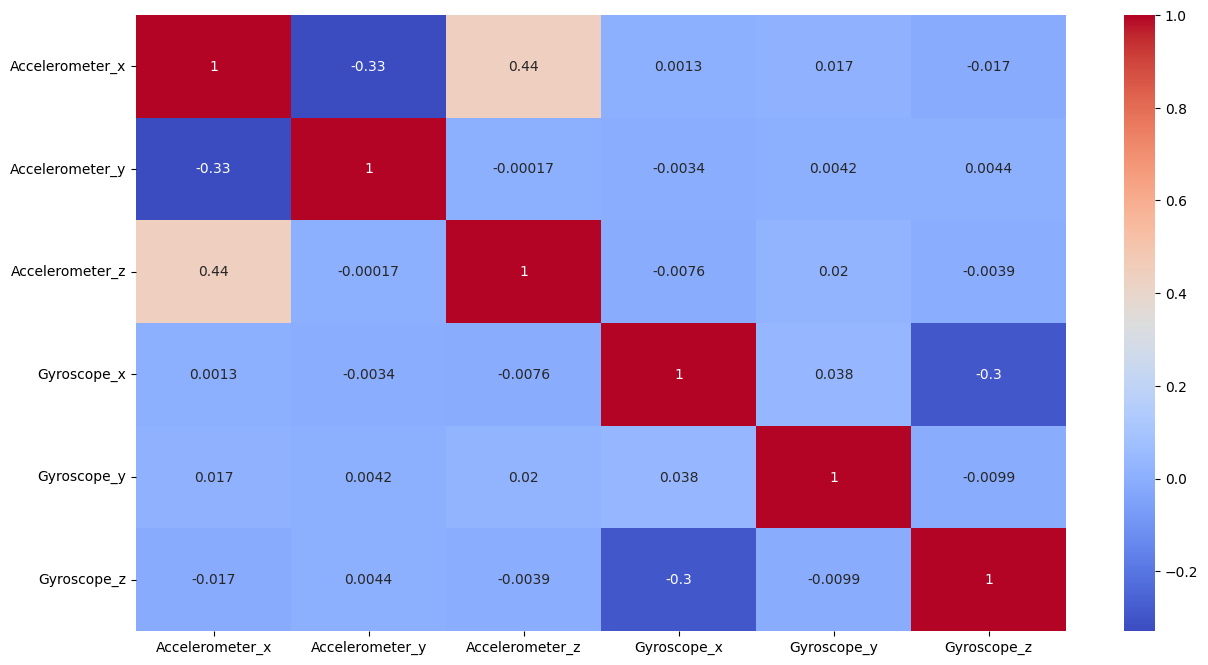

In [18]:
plt.figure(figsize=[15,8])
sns.heatmap(df_new.corr(numeric_only=True),cmap='coolwarm',annot=True)
plt.show()

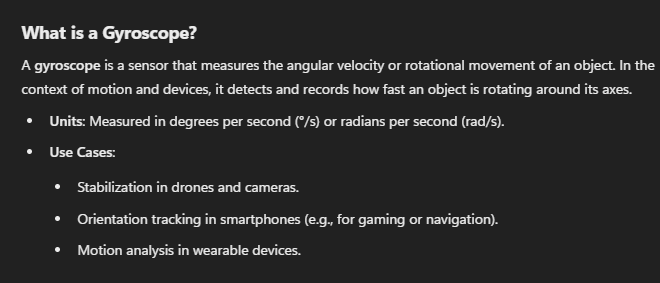

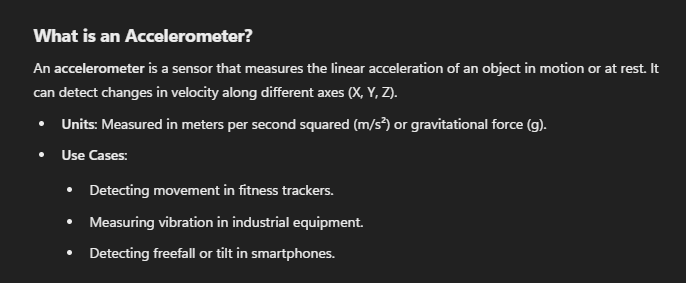

In [19]:
label_array = ['bench','ohp','dead','squat','row','rest']

In [20]:
X=df_new.iloc[:,:-1]
X.shape

(9009, 6)

In [21]:
X.head()

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098


In [22]:
Y=df_new.iloc[:,-1]
Y.shape

(9009,)

In [23]:
Y.head()

0    bench
1    bench
2    bench
3    bench
4    bench
Name: Label, dtype: object

In [24]:
Y = Y.map({'bench':0,'ohp':1,'dead':2,'squat':3,'row':4,'rest':5})
Y

0       0
1       0
2       0
3       0
4       0
       ..
9004    4
9005    4
9006    4
9007    4
9008    4
Name: Label, Length: 9009, dtype: int64

## Train Test Split

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=1)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7207, 6)
(1802, 6)
(7207,)
(1802,)


In [27]:
Y_test.head()

7674    5
4951    2
1975    2
6807    0
7396    4
Name: Label, dtype: int64

In [28]:
Y_test

7674    5
4951    2
1975    2
6807    0
7396    4
       ..
3406    0
2722    1
5768    2
8487    5
3720    4
Name: Label, Length: 1802, dtype: int64

## Model Building

In [29]:
randomforest = RandomForestClassifier(n_estimators=10)

In [30]:
randomforest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

## Model Evaluation

In [31]:
print(randomforest.score(X_test,Y_test))

0.9517203107658158


In [32]:
X_test.head()

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z
7674,0.694000,-0.383000,0.628000,1.5854,-2.2076,0.683200
4951,-0.042500,-1.100500,-0.067000,0.4022,-3.8416,-4.536600
1975,0.030667,-0.602000,0.110000,57.1706,-1.5732,4.963400
6807,-0.071000,0.965667,-0.204667,-12.7804,6.4512,5.634400
7396,-0.044000,-1.029000,-0.044000,-0.6710,-4.4920,1.138333


## Model Prediction

In [33]:
result = randomforest.predict([[0.694000,0.383000,0.628000,1.5854,-2.2076,0.683200]])

c:\Users\LENOVO\Documents\1.Personal\0.Projects\Virtual_Environments\.ds_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
label_array[result[0]]

'squat'

## Convert the model to model.h file
``` python
pip install micromlgen
```
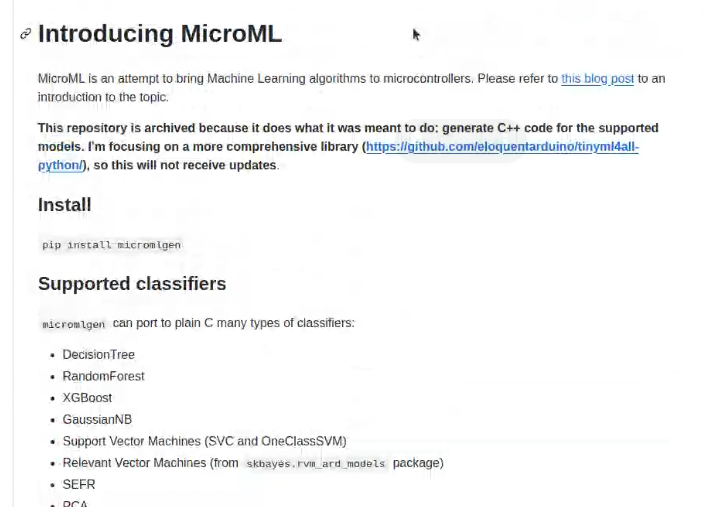

**Note**: For Neural Network `tensorflowlite` can be used

In [35]:
from micromlgen import port

**Note**: `port()` in micormlgen converts the python model into c code

In [36]:
with open('./include/model.h','w') as file:
    file.write(port(randomforest))

The model.h code generated is **Edge AI**. Below gives more details on what it does and other elements:

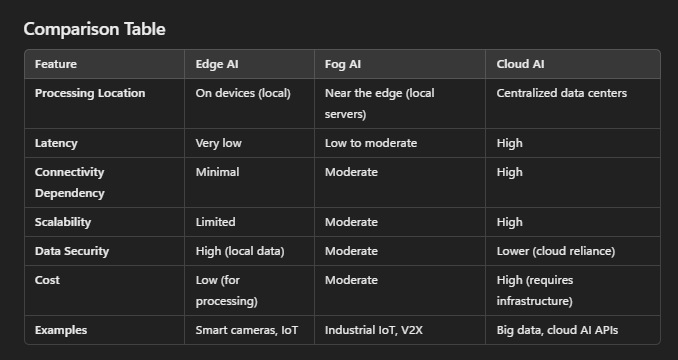

## Deploy Code to Emulator at [**wokwi.com**](https://wokwi.com/)

In [37]:
# void setup() {
#   // put your setup code here, to run once:
#   Serial.begin(115200);
#   Serial.println("Hello, ESP32-S3!");
#   pinMode(8, OUTPUT);
# }

# void loop() {
#   // put your main code here, to run repeatedly:
#   delay(10); // this speeds up the simulation
#   digitalWrite(8,HIGH);
#   delay(1000);
#   digitalWrite(8, LOW);
#   delay(1000);
# }

For Example below is sample LED blinking project

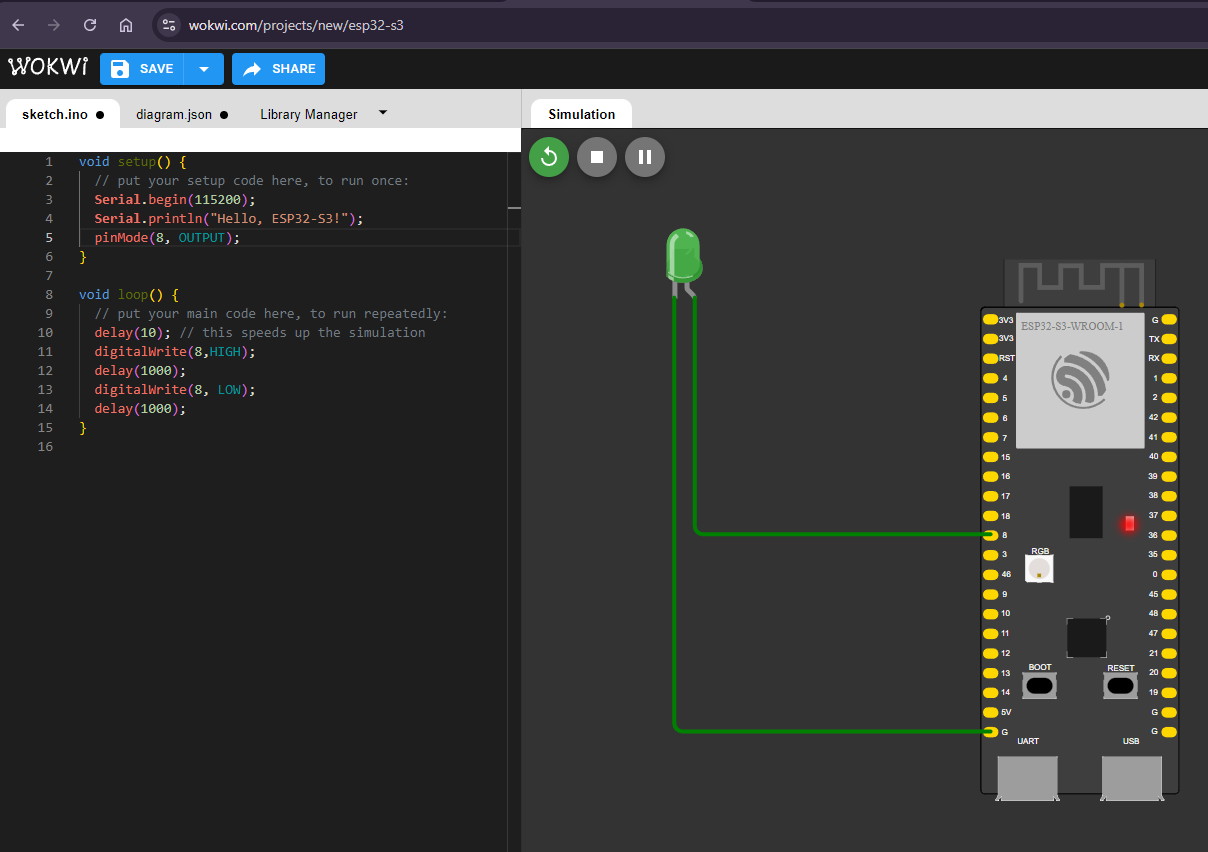

# Below is the Schematic Diagram for Connections to LCD, MPU6050

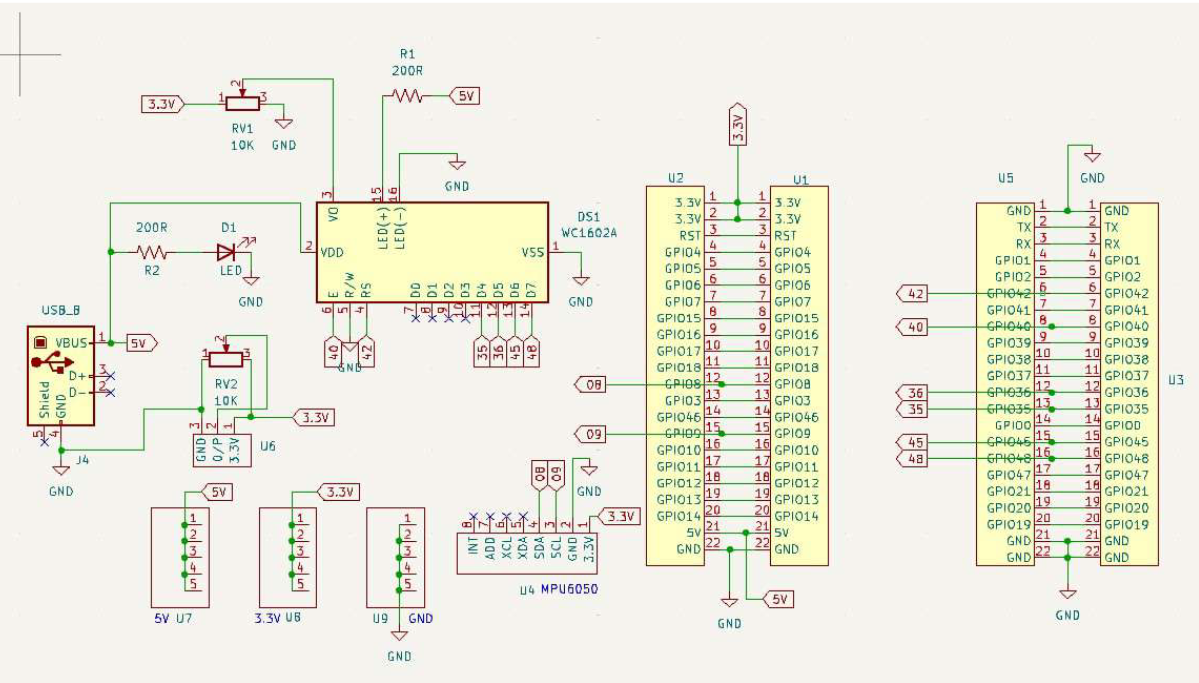

# Below was generated in the `wokwi` to simulate the motion sensing

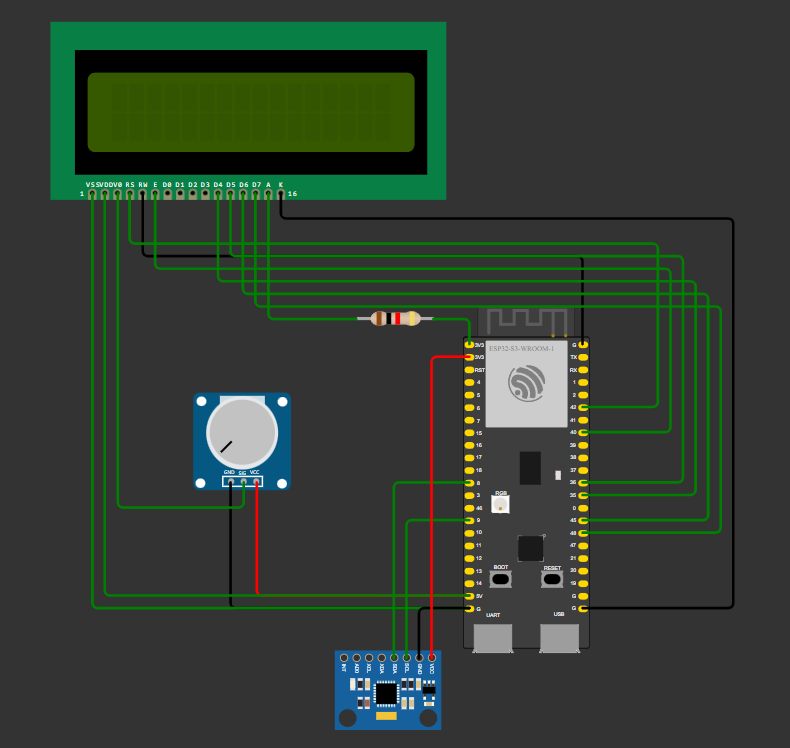